In [5]:
# load useful libraries
library(data.table)
library(ggplot2)
library(qvalue)

In [6]:
# load rare variant results
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"
myfile = paste0(saige_dir, "all_cis_rare_with_dTSS_weights.results.txt")
df = as.data.frame(fread(myfile))

In [7]:
head(df)

,celltype,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Plasma,A1BG,null,0,0.05,dTSS,0.8766689,0.6772141,NA,0.9442545,0.7618615,0.007958452,0.002500256,23392.80,561,1340
2,Plasma,A1BG,null,0,0.05,Beta_1_25,0.6739423,0.5819687,NA,0.4340790,0.8364173,-0.002087573,0.006287923,23904.00,561,1340
3,Plasma,A1BG,null,0,0.05,Equal_Weights,0.7201885,0.5936323,NA,0.5116708,0.8611497,-0.022259367,0.380390295,23904.00,561,1340
4,Plasma,A1BG,Cauchy,NA,NA,NA,0.7907711,0.6200851,NA,0.8405194,0.8278134,NA,NA,NA,NA,NA
5,Plasma,AAAS,null,0,0.05,dTSS,0.6182132,0.7822394,NA,0.3631167,0.6213246,0.183845477,0.262531214,60774.94,1300,2874
6,Plasma,AAAS,null,0,0.05,Beta_1_25,0.6642145,0.8399541,NA,0.2850562,0.6909263,0.003461475,0.003047685,61285.00,1300,2874


In [8]:
# extract unique cell types
celltypes = unique(df$celltype)
length(celltypes)

[1] 14

In [9]:
# extract different weight results per gene
df_to_plot = data.frame()
for (celltype in celltypes){
    df0 = df[df$celltype == celltype & df$Weight == "Equal_Weights",]
    df0 <- df0[rowSums(is.na(df0)) != ncol(df0), ]
    df1 = df[df$celltype == celltype & df$Weight == "Beta_1_25",]
    df1 <- df1[rowSums(is.na(df1)) != ncol(df1), ]
    df2 = df[df$celltype == celltype & df$Weight == "dTSS",]
    df2 <- df2[rowSums(is.na(df2)) != ncol(df2), ]
    df0$qv = qvalue(df0$Pvalue)$qvalues
    df1$qv = qvalue(df1$Pvalue)$qvalues
    df2$qv = qvalue(df2$Pvalue)$qvalues
    new_df0 = data.frame(celltype = celltype,
                         weight = "equal_weights",
                         n = nrow(df0[df0$qv < 0.05,]))
    new_df1 = data.frame(celltype = celltype,
                         weight = "beta_1_25",
                         n = nrow(df1[df1$qv < 0.05,]))
    new_df2 = data.frame(celltype = celltype,
                         weight = "dTSS",
                         n = nrow(df2[df2$qv < 0.05,]))
    df_to_plot = rbind(df_to_plot, new_df0, new_df1, new_df2)
}
df_to_plot$celltype_weight = paste0(df_to_plot$celltype,"-",df_to_plot$weight)
head(df_to_plot)

,celltype,weight,n,celltype_weight
,<chr>,<chr>,<int>,<chr>
1,Plasma,equal_weights,10,Plasma-equal_weights
2,Plasma,beta_1_25,10,Plasma-beta_1_25
3,Plasma,dTSS,15,Plasma-dTSS
4,NK,equal_weights,628,NK-equal_weights
5,NK,beta_1_25,615,NK-beta_1_25
6,NK,dTSS,998,NK-dTSS


In [10]:
# reorder factors 
df_to_plot$celltype_weight <- factor(df_to_plot$celltype_weight, 
                                    levels = c("CD4_NC-equal_weights","CD4_NC-beta_1_25","CD4_NC-dTSS",
                                               "CD4_ET-equal_weights","CD4_ET-beta_1_25","CD4_ET-dTSS",
                                               "CD4_SOX4-equal_weights","CD4_SOX4-beta_1_25","CD4_SOX4-dTSS",
                                               "CD8_ET-equal_weights","CD8_ET-beta_1_25","CD8_ET-dTSS",
                                               "CD8_NC-equal_weights","CD8_NC-beta_1_25","CD8_NC-dTSS",
                                               "CD8_S100B-equal_weights","CD8_S100B-beta_1_25","CD8_S100B-dTSS",
                                               "NK-equal_weights","NK-beta_1_25","NK-dTSS",
                                               "NK_R-equal_weights","NK_R-beta_1_25","NK_R-dTSS",
                                               "Plasma-equal_weights","Plasma-beta_1_25","Plasma-dTSS",
                                               "B_Mem-equal_weights","B_Mem-beta_1_25","B_Mem-dTSS",
                                               "B_IN-equal_weights","B_IN-beta_1_25","B_IN-dTSS",
                                               "Mono_C-equal_weights","Mono_C-beta_1_25","Mono_C-dTSS",
                                               "Mono_NC-equal_weights","Mono_NC-beta_1_25","Mono_NC-dTSS",
                                               "DC-equal_weights","DC-beta_1_25","DC-dTSS"))

In [11]:
# specify colours
df_colours = data.frame(colours = c("#882E72","#882E72","#882E72",
                                    "#B178A6","#B178A6","#B178A6",
                                    "#D6C1DE","#D6C1DE","#D6C1DE",
                                    "#1965B0","#1965B0","#1965B0",
                                    "#5289C7","#5289C7","#5289C7",
                                    "#7BAFDE","#7BAFDE","#7BAFDE",
                                    "#4EB265","#4EB265","#4EB265",
                                    "#90C987","#90C987","#90C987",
                                    "#CAE0AB","#CAE0AB","#CAE0AB",
                                    "#F7EE55","#F7EE55","#F7EE55",
                                    "#F6C141","#F6C141","#F6C141",
                                    "#F1932D","#F1932D","#F1932D",
                                    "#E8601C","#E8601C","#E8601C",
                                    "#DC050C","#DC050C","#DC050C"),
                        celltype_weight = c("CD4_NC-equal_weights","CD4_NC-beta_1_25","CD4_NC-dTSS",
                                               "CD4_ET-equal_weights","CD4_ET-beta_1_25","CD4_ET-dTSS",
                                               "CD4_SOX4-equal_weights","CD4_SOX4-beta_1_25","CD4_SOX4-dTSS",
                                               "CD8_ET-equal_weights","CD8_ET-beta_1_25","CD8_ET-dTSS",
                                               "CD8_NC-equal_weights","CD8_NC-beta_1_25","CD8_NC-dTSS",
                                               "CD8_S100B-equal_weights","CD8_S100B-beta_1_25","CD8_S100B-dTSS",
                                               "NK-equal_weights","NK-beta_1_25","NK-dTSS",
                                               "NK_R-equal_weights","NK_R-beta_1_25","NK_R-dTSS",
                                               "Plasma-equal_weights","Plasma-beta_1_25","Plasma-dTSS",
                                               "B_Mem-equal_weights","B_Mem-beta_1_25","B_Mem-dTSS",
                                               "B_IN-equal_weights","B_IN-beta_1_25","B_IN-dTSS",
                                               "Mono_C-equal_weights","Mono_C-beta_1_25","Mono_C-dTSS",
                                               "Mono_NC-equal_weights","Mono_NC-beta_1_25","Mono_NC-dTSS",
                                               "DC-equal_weights","DC-beta_1_25","DC-dTSS"))

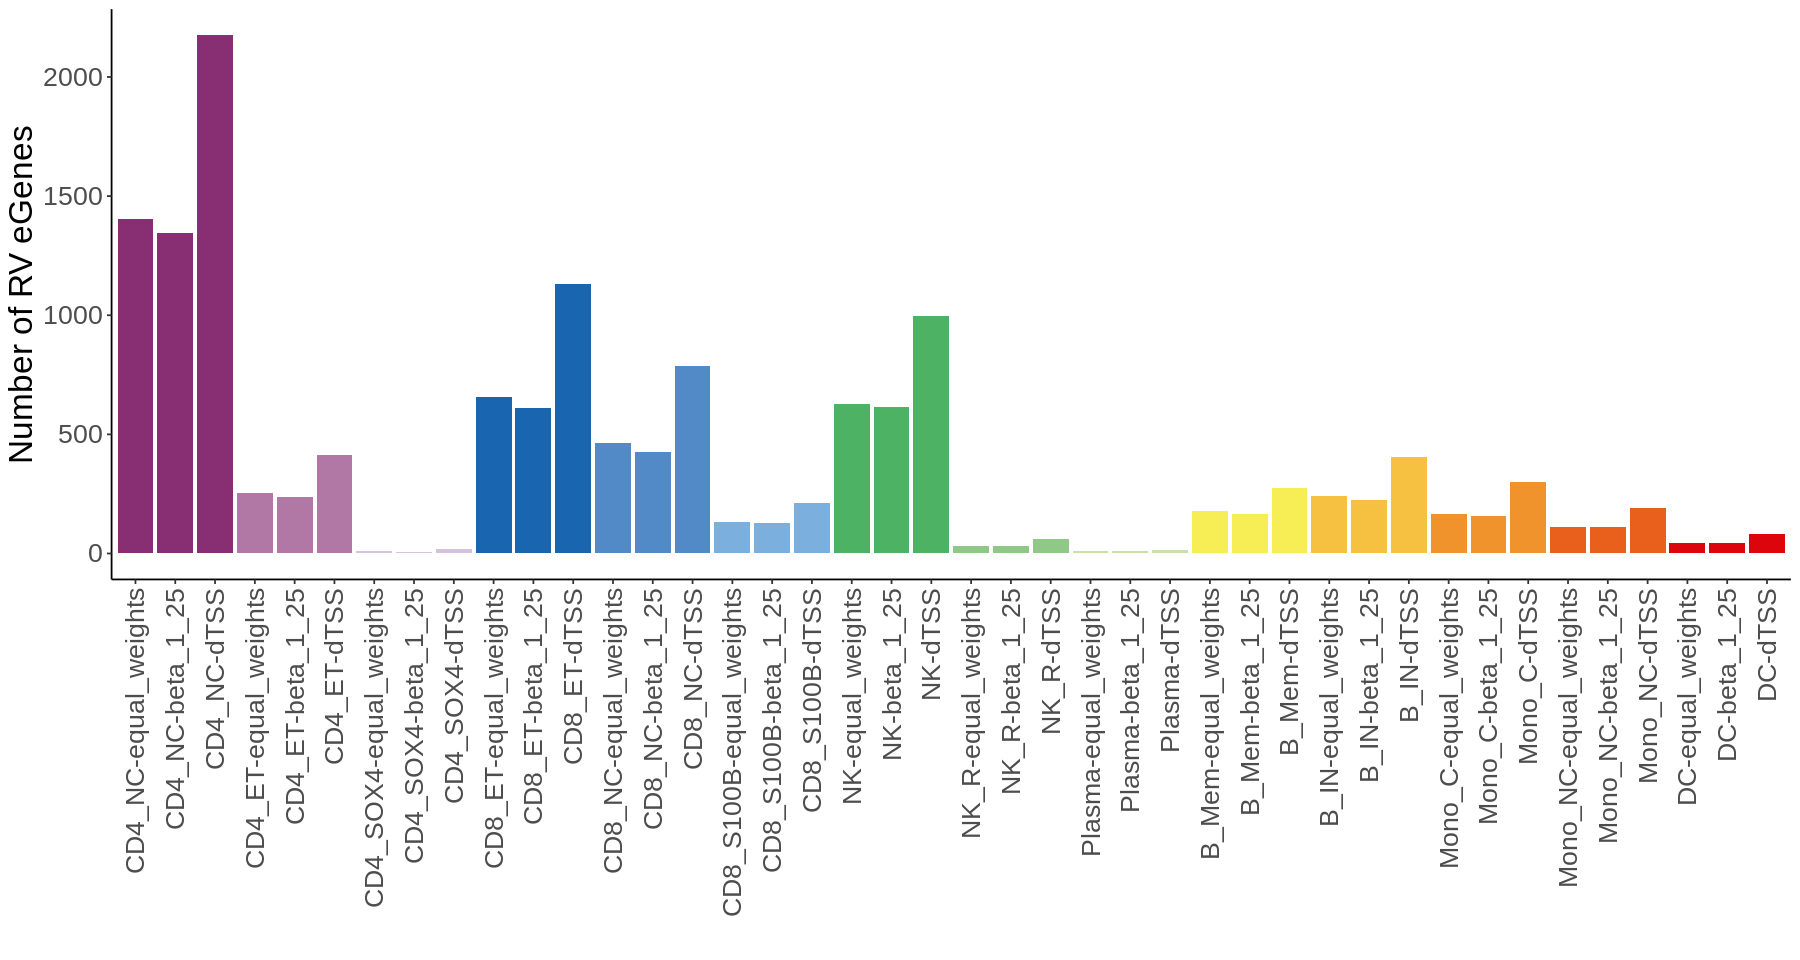

In [12]:
# plot
options(repr.plot.width = 15, repr.plot.height = 8)
p = ggplot(df_to_plot, aes(x=celltype_weight, y=n, fill=celltype_weight)) 
p = p + geom_bar(stat = "identity") 
p = p + scale_fill_manual(values = df_colours$colours) 
p = p + theme_classic() + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), legend.position = "none")
p = p + ylab("Number of RV eGenes") + xlab("") 
p

In [13]:
# save
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"RV_weights_all_celltypes.pdf"), width=15, height=8)
p
dev.off()

png 
  2